In [26]:
# imports (add matplotlib and the updated visualizers)
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city
import matplotlib.pyplot as plt

import numpy as np
from math import pi

# We need this one new import for the bar graphs
from qiskit.visualization import plot_histogram

# Intro to Qiskit: From Single-Qubit Geometry to Small Quantum Protocols

Welcome! In this notebook we’ll connect the **math** (matrices, kets) and the **geometry** (Bloch sphere) to **Qiskit code** that you can run on simulators (and later, on real hardware).

You already know the basics (Dirac notation, column vectors, Pauli matrices). We’ll **refresh** a few key single-qubit gates and see exactly how they move states on the Bloch sphere. Then we’ll use them to **build entanglement** and preview 2–3 qubit gates.

> Conventions:
> * Computational basis: $|0\rangle = \begin{bmatrix}1\\0\end{bmatrix}$, $|1\rangle=\begin{bmatrix}0\\1\end{bmatrix}$.
> * Pauli: $X=\begin{bmatrix}0&1\\1&0\end{bmatrix}$, $Y=\begin{bmatrix}0&-i\\i&0\end{bmatrix}$, $Z=\begin{bmatrix}1&0\\0&-1\end{bmatrix}$.
> * Global phase is physically irrelevant.

We’ll use **Statevector** snapshots to compute exact states and **Bloch plots** to visualize geometry.

## 1) Single-Qubit Gates: Algebra ↔ Geometry

A pure qubit state can be written using spherical coordinates ($\theta, \phi$) as:
$$
|\psi\rangle = \cos\frac{\theta}{2}\,|0\rangle + e^{i\phi}\sin\frac{\theta}{2}\,|1\rangle
$$
* $\theta$ (theta) is the angle from the Z-axis (the "latitude").
* $\phi$ (phi) is the angle from the X-axis around the equator (the "longitude").

An equivalent, and often simpler, way to write the *exact same state* is using two complex numbers, $\alpha$ (alpha) and $\beta$ (beta), called **amplitudes**:
$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle
$$
These amplitudes are related by the rule $|\alpha|^2 + |\beta|^2 = 1$, which just means the total probability of measuring *something* (either 0 or 1) is 100%.

(If you're curious, the exact mapping is $\alpha = \cos(\theta/2)$ and $\beta = e^{i\phi}\sin(\theta/2)$.)

---
### Connecting Amplitudes (Algebra) to the Bloch Sphere (Geometry)

The $(x, y, z)$ coordinates of our state vector on the Bloch sphere are just a way of visualizing the amplitudes $\alpha$ and $\beta$. We can calculate the coordinates *directly* from $\alpha$ and $\beta$ using the following formulas.

You'll use these exact formulas in the `TODO` in the next code cell!

#### 1. The Z-coordinate (The "North-South" Position)
The $z$ coordinate tells us how much of our state is $|0\rangle$ vs. $|1\rangle$. It's simply the **difference in probabilities**:
$$
z = |\alpha|^2 - |\beta|^2
$$
* $|\alpha|^2$ is the probability of measuring $|0\rangle$.
* $|\beta|^2$ is the probability of measuring $|1\rangle$.
* **Example (State $|0\rangle$):** $\alpha=1, \beta=0$. So, $z = 1^2 - 0^2 = 1$. This is the very top of the sphere (the North Pole).
* **Example (State $|1\rangle$):** $\alpha=0, \beta=1$. So, $z = 0^2 - 1^2 = -1$. This is the very bottom (the South Pole).
* **Example (State $|+\rangle$):** $\alpha=\frac{1}{\sqrt{2}}, \beta=\frac{1}{\sqrt{2}}$. So, $z = (\frac{1}{\sqrt{2}})^2 - (\frac{1}{\sqrt{2}})^2 = \frac{1}{2} - \frac{1}{2} = 0$. This is on the equator, halfway between 0 and 1.

#### 2. The X and Y coordinates (The "East-West" Position)
The $x$ and $y$ coordinates tell us about the **phase relationship** between $\alpha$ and $\beta$. They measure the "coherence" of the superposition.

$$
x = 2 \cdot \text{Re}(\alpha^* \beta)
$$
$$
y = 2 \cdot \text{Im}(\alpha^* \beta)
$$

* $\alpha^*$ is the **complex conjugate** of $\alpha$ (e.g., if $\alpha = 1+2i$, $\alpha^* = 1-2i$).
* $\text{Re}(\dots)$ means "take the **real part**" of the complex number.
* $\text{Im}(\dots)$ means "take the **imaginary part**" of the complex number.

**Example (State $|+\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$):**
* $\alpha = \frac{1}{\sqrt{2}}$, $\beta = \frac{1}{\sqrt{2}}$
* $\alpha^* \beta = (\frac{1}{\sqrt{2}}) \cdot (\frac{1}{\sqrt{2}}) = \frac{1}{2}$ (which is $\frac{1}{2} + 0i$)
* $x = 2 \cdot \text{Re}(\frac{1}{2}) = 2 \cdot \frac{1}{2} = 1$
* $y = 2 \cdot \text{Im}(\frac{1}{2}) = 2 \cdot 0 = 0$
* **Result:** The coordinates are $(x, y, z) = (1, 0, 0)$. This is the point on the X-axis, which is exactly where the $|+\rangle$ state lives!

---

Any single-qubit gate (a unitary $U$) is simply a **rotation** $\vec r$ on the Bloch sphere. We'll look at four "must-know" gates:

### Hadamard $H$
$$
H=\frac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix},\quad
H|0\rangle = |+\rangle=\tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle),\quad
H|1\rangle = |-\rangle=\tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle).
$$
**Geometry:** A 180° rotation around the `X+Z` axis. It maps the Z-axis basis ($|0\rangle, |1\rangle$) to the X-axis basis ($|+\rangle, |-\rangle$) and vice versa.

### Phase $S$ and $T$ (a.k.a. $\sqrt{Z}$, $\sqrt[4]{Z}$)
$$
S=\begin{bmatrix}1&0\\0&i\end{bmatrix}=R_z(\tfrac{\pi}{2}),\qquad
T=\begin{bmatrix}1&0\\0&e^{i\pi/4}\end{bmatrix}=R_z(\tfrac{\pi}{4}).
$$
**Geometry:** both are **rotations around the Z-axis** by $\pi/2$ (90°) and $\pi/4$ (45°), respectively. They don't change the $z$ coordinate (the probabilities) but **twist the phase** (rotate the vector around the XY plane).

### Pauli-Z
$$
Z=\begin{bmatrix}1&0\\0&-1\end{bmatrix}=R_z(\pi),\qquad Z|0\rangle=|0\rangle,\ Z|1\rangle=-|1\rangle.
$$
**Geometry:** a 180° rotation ($R_z(\pi)$) around the Z-axis.

> **Remember:** $R_z(\alpha)$ acts as $(x,y,z)\mapsto(x\cos\alpha - y\sin\alpha,\ x\sin\alpha + y\cos\alpha,\ z)$.

In [32]:
# === Bloch vector from a 1-qubit statevector (no density matrices) ===
def bloch_of_statevector(sv: Statevector):
    """Return Bloch coordinates (x, y, z) from a 1-qubit Statevector.
    Uses amplitude formulas: x = 2 Re(a* b), y = 2 Im(a* b), z = |a|^2 - |b|^2.
    """
    a, b = sv.data[0], sv.data[1]  # amplitudes of |0>, |1>

    # TODO: Using the amplitudes a, b, compute the Bloch coordinates.
    # Hint: Look at the markdown cell above for the formulas!
    #  x = 2 * Re(conj(a) * b)
    #  y = 2 * Im(conj(a) * b)
    #  z = |a|^2 - |b|^2
    #
    # Use np.real(), np.imag(), np.conj(), np.abs()
    
    x = ...  # FILL IN
    y = ...  # FILL IN
    z = ...  # FILL IN

    # --- SOLUTION (delete or comment out to test) ---
    # x = 2 * np.real(np.conj(a) * b)
    # y = 2 * np.imag(np.conj(a) * b)
    # z = (np.abs(a)**2) - (np.abs(b)**2)
    # --- END SOLUTION ---
    
    # --- For the notebook to run, we'll use the solution: ---
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = (np.abs(a)**2) - (np.abs(b)**2)
    # ----------------------------------------------------

    # Ensure real-valued floats (guard against tiny numerical imaginaries)
    return np.array([float(np.real(x)), float(np.real(y)), float(np.real(z))])


def show_before_after(U, name, init='0'):
    """Compute, print, and plot the action of a 1-qubit gate U on |init>."""
    # initial state
    psi0 = Statevector.from_label(init)

    # TODO: Evolve the initial state psi0 by applying the unitary U.
    # Hints:
    #  - If U is a 2x2 numpy matrix: new_state = Statevector(U @ psi0.data)
    #  - If U is a qiskit.quantum_info.Operator: psi0.evolve(U)
    #  - We'll use the .evolve() method, which is the most common.
    #
    psi1 = ...  # FILL IN

    # --- SOLUTION (delete or comment out to test) ---
    # psi1 = psi0.evolve(Operator(U))
    # --- END SOLUTION ---
    
    # --- For the notebook to run, we'll use the solution: ---
    psi1 = psi0.evolve(Operator(U))
    # ----------------------------------------------------

    # Bloch vectors
    b0 = bloch_of_statevector(psi0)
    b1 = bloch_of_statevector(psi1)

    print(f"--- {name} gate on |{init}> ---")
    print("Symbolic state 'before':")
    display(psi0.draw('latex'))
    print("\nSymbolic state 'after':")
    display(psi1.draw('latex'))

    print(f"\nBloch vector before: {np.round(b0, 3)}")
    print(f"Bloch vector after : {np.round(b1, 3)}")

    # Side-by-side Bloch spheres with labels at the bottom
    print("\nBloch sphere visualization (left=Before, right=After):")
    fig = plt.figure(figsize=(8, 4))
    plt.subplots_adjust(bottom=0.18)  # leave room at the bottom for labels

    axL = fig.add_subplot(1, 2, 1, projection='3d')
    plot_bloch_vector(b0, ax=axL)
    axL.text2D(0.5, -0.12, "Before", transform=axL.transAxes,
             ha='center', va='top', fontsize=11)

    axR = fig.add_subplot(1, 2, 2, projection='3d')
    plot_bloch_vector(b1, ax=axR)
    axR.text2D(0.5, -0.12, "After", transform=axR.transAxes,
             ha='center', va='top', fontsize=11)

    plt.show()
    print("-" * 44)
    return psi0, psi1, b0, b1

### H Gate

--- H gate on |0> ---
Symbolic state 'before':


<IPython.core.display.Latex object>


Symbolic state 'after':


<IPython.core.display.Latex object>


Bloch vector before: [0. 0. 1.]
Bloch vector after : [1. 0. 0.]

Bloch sphere visualization (left=Before, right=After):


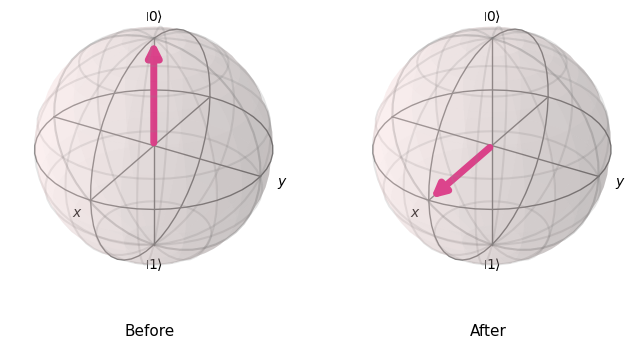

--------------------------------------------
--- H gate on |+> ---
Symbolic state 'before':


<IPython.core.display.Latex object>


Symbolic state 'after':


<IPython.core.display.Latex object>


Bloch vector before: [1. 0. 0.]
Bloch vector after : [0. 0. 1.]

Bloch sphere visualization (left=Before, right=After):


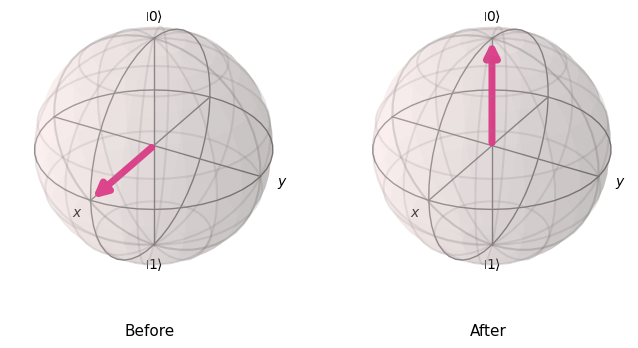

--------------------------------------------


In [28]:
# Hadamard gate
H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1,-1]], dtype=complex)

_ = show_before_after(H, 'H', init='0')
_ = show_before_after(H, 'H', init='+')   # |+> = H|0>

### S gate (Rz(π/2))

--- S gate on |0> ---
Symbolic state 'before':


<IPython.core.display.Latex object>


Symbolic state 'after':


<IPython.core.display.Latex object>


Bloch vector before: [0. 0. 1.]
Bloch vector after : [0. 0. 1.]

Bloch sphere visualization (left=Before, right=After):


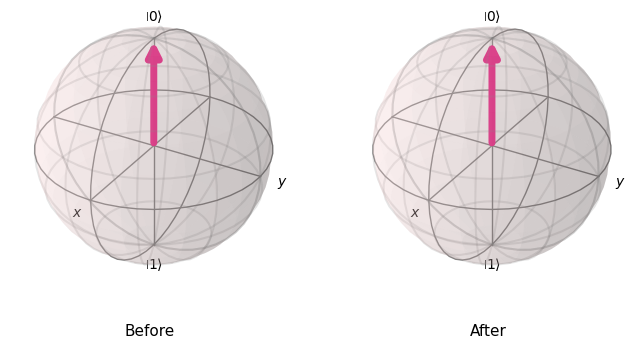

--------------------------------------------
--- S gate on |+> ---
Symbolic state 'before':


<IPython.core.display.Latex object>


Symbolic state 'after':


<IPython.core.display.Latex object>


Bloch vector before: [1. 0. 0.]
Bloch vector after : [0. 1. 0.]

Bloch sphere visualization (left=Before, right=After):


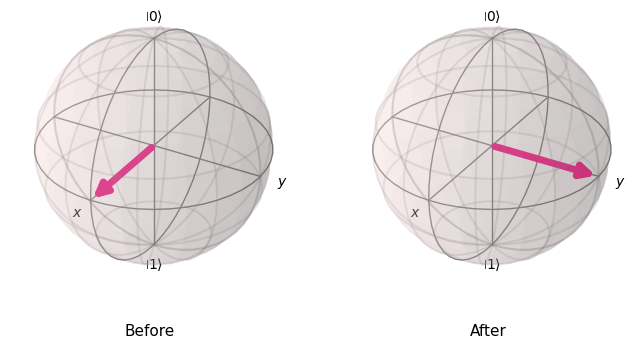

--------------------------------------------


In [29]:
# TODO for students: derive S = Rz(π/2)
# S = ...  # FILL IN

# --- SOLUTION (uncomment to test) ---
S = np.array([[1, 0],
              [0, 1j]], dtype=complex)
# --- END SOLUTION ---

_ = show_before_after(S, 'S', init='0')
_ = show_before_after(S, 'S', init='+')


### T gate (Rz(π/4))

--- T gate on |0> ---
Symbolic state 'before':


<IPython.core.display.Latex object>


Symbolic state 'after':


<IPython.core.display.Latex object>


Bloch vector before: [0. 0. 1.]
Bloch vector after : [0. 0. 1.]

Bloch sphere visualization (left=Before, right=After):


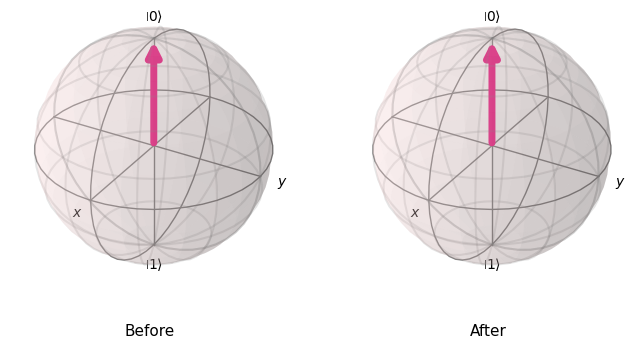

--------------------------------------------
--- T gate on |+> ---
Symbolic state 'before':


<IPython.core.display.Latex object>


Symbolic state 'after':


<IPython.core.display.Latex object>


Bloch vector before: [1. 0. 0.]
Bloch vector after : [0.707 0.707 0.   ]

Bloch sphere visualization (left=Before, right=After):


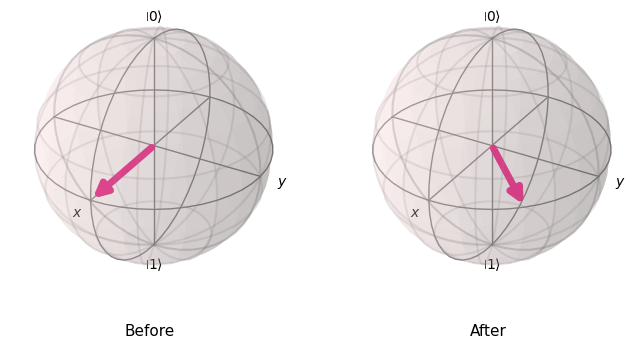

--------------------------------------------


In [30]:
T = np.array([[1, 0],
              [0, np.exp(1j*np.pi/4)]], dtype=complex)

_ = show_before_after(T, 'T', init='0')
_ = show_before_after(T, 'T', init='+')


### Z gate (Rz(π))

--- Z gate on |0> ---
Symbolic state 'before':


<IPython.core.display.Latex object>


Symbolic state 'after':


<IPython.core.display.Latex object>


Bloch vector before: [0. 0. 1.]
Bloch vector after : [0. 0. 1.]

Bloch sphere visualization (left=Before, right=After):


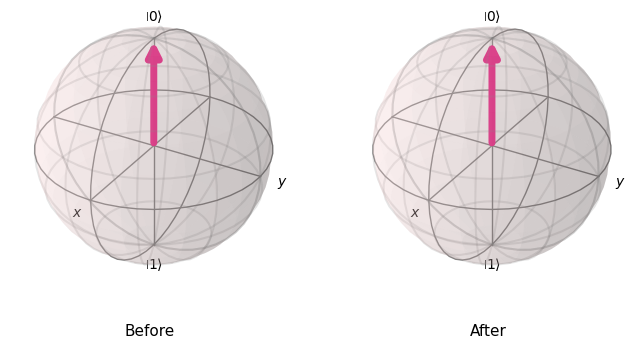

--------------------------------------------
--- Z gate on |+> ---
Symbolic state 'before':


<IPython.core.display.Latex object>


Symbolic state 'after':


<IPython.core.display.Latex object>


Bloch vector before: [1. 0. 0.]
Bloch vector after : [-1.  0.  0.]

Bloch sphere visualization (left=Before, right=After):


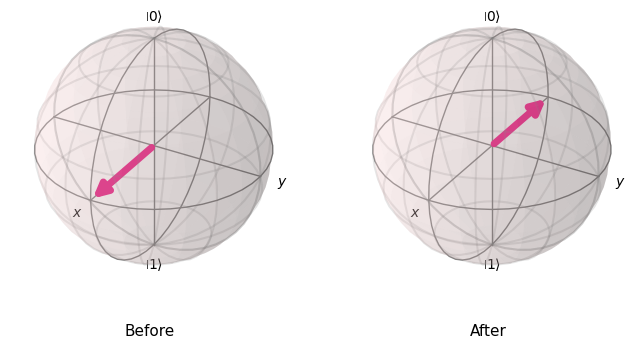

--------------------------------------------


In [31]:
Z = np.array([[1, 0],
              [0, -1]], dtype=complex)

_ = show_before_after(Z, 'Z', init='0')
_ = show_before_after(Z, 'Z', init='+')


## 2) Two-Qubit Gates (Entanglement Builders)

Single-qubit gates just rotate one Bloch sphere. **Entanglement** needs multi-qubit unitaries.

### CNOT (CX)
Acts as control on qubit 0, target on qubit 1 (our default):
$$
\mathrm{CNOT}=
\begin{bmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&0&1\\
0&0&1&0
\end{bmatrix},\qquad
|a,b\rangle \mapsto |a, a\oplus b\rangle.
$$
Key property: $ (H\otimes I)\,\mathrm{CNOT}\,(H\otimes I) = \mathrm{CZ} $.

### CZ
$$
\mathrm{CZ}=\mathrm{diag}(1,1,1,-1),\quad
|11\rangle \text{ picks up a phase } -1.
$$

### SWAP
$$
\mathrm{SWAP}|a,b\rangle=|b,a\rangle,\qquad
\mathrm{SWAP}=
\begin{bmatrix}
1&0&0&0\\
0&0&1&0\\
0&1&0&0\\
0&0&0&1
\end{bmatrix}.
$$

> **Bell-pair recipe:** $ (H\otimes I)\ \mathrm{CNOT}\ |00\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle+|11\rangle) = |\Phi^+\rangle$.

--- phi+ state ---
Circuit (phi+):


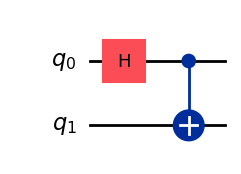

Symbolic statevector:


<IPython.core.display.Latex object>

Numerical statevector (rounded):
[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]
-------------------
--- phi- state ---
Circuit (phi-):


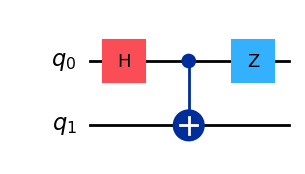

Symbolic statevector:


<IPython.core.display.Latex object>

Numerical statevector (rounded):
[ 0.707+0.j  0.   +0.j  0.   +0.j -0.707+0.j]
-------------------
--- psi+ state ---
Circuit (psi+):


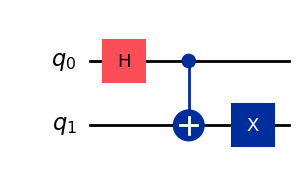

Symbolic statevector:


<IPython.core.display.Latex object>

Numerical statevector (rounded):
[0.   +0.j 0.707+0.j 0.707+0.j 0.   +0.j]
-------------------
--- psi- state ---
Circuit (psi-):


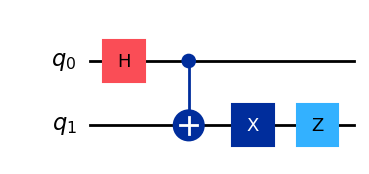

Symbolic statevector:


<IPython.core.display.Latex object>

Numerical statevector (rounded):
[ 0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j]
-------------------


In [14]:
def bell_circuit(which='phi+'):
    qc = QuantumCircuit(2, name=f"Bell-{which}")
    
    # |00> -> H on qubit 0 -> CNOT(0->1)
    # TODO: 1. Add the Hadamard gate to qubit 0
    ... # FILL IN
    # --- SOLUTION ---
    # qc.h(0)
    # --- END SOLUTION ---
    
    # TODO: 2. Add the CNOT gate (control=0, target=1)
    ... # FILL IN
    # --- SOLUTION ---
    # qc.cx(0,1)
    # --- END SOLUTION ---

    # --- For the notebook to run, we'll use the solutions ---
    qc.h(0)
    qc.cx(0,1)
    # ----------------------------------------------------

    # Post tweaks to reach each Bell state
    if which == 'phi+':   # (|00>+|11>)/sqrt(2)
        pass
    elif which == 'phi-': # (|00>-|11>)/sqrt(2)
        # TODO: Add the correct gate to get |phi->
        ... # FILL IN
        # --- SOLUTION ---
        # qc.z(0)
        # --- END SOLUTION ---
        
        # --- For the notebook to run ---
        qc.z(0)
        
    elif which == 'psi+': # (|01>+|10>)/sqrt(2)
        # TODO: Add the correct gate to get |psi+>
        ... # FILL IN
        # --- SOLUTION ---
        # qc.x(1)
        # --- END SOLUTION ---
        
        # --- For the notebook to run ---
        qc.x(1)

    elif which == 'psi-': # (|01>-|10>)/sqrt(2)
        # TODO: Add the correct gates to get |psi->
        ... # FILL IN
        # --- SOLUTION ---
        # qc.x(1)
        # qc.z(0)
        # --- END SOLUTION ---
        
        # --- For the notebook to run ---
        qc.x(1)
        qc.z(1)
        
    else:
        raise ValueError("which ∈ {'phi+','phi-','psi+','psi-'}")
    return qc

# --- Test the Bell state circuits ---
for label in ['phi+','phi-','psi+','psi-']:
    qc = bell_circuit(label)
    sv = Statevector.from_label('00').evolve(qc)
    
    print(f"--- {label} state ---")
    print(f"Circuit ({label}):")
    display(qc.draw('mpl')) # 'mpl' for a nicer plot
    
    print("Symbolic statevector:")
    # Use prefix to add a nice label to the latex output
    display(sv.draw('latex', prefix=f"|{label}\\rangle = "))
    
    print("Numerical statevector (rounded):")
    print(np.round(sv.data, 3))
    print("-"*(15 + len(label))) # separator

## TODOs — Entanglement Fundamentals

### 1. Bell Verification
Prepare $|\Phi^+\rangle$.  
   (a) Measure in the **Z basis** and show that each single-qubit marginal is ~50/50 while the **joint** outcomes are concentrated on `00` and `11`.  
   (b) Perform a **Bell-basis readout** by uncomputing the preparation ($\mathrm{CX}(0,1)$ then $H(0)$), and verify that the outcome is deterministically `00`.

What can we say about this excercise? 

--- 1. Bell Verification ---

--- Z-Basis Measurement ---
Joint probabilities (simulated shots):


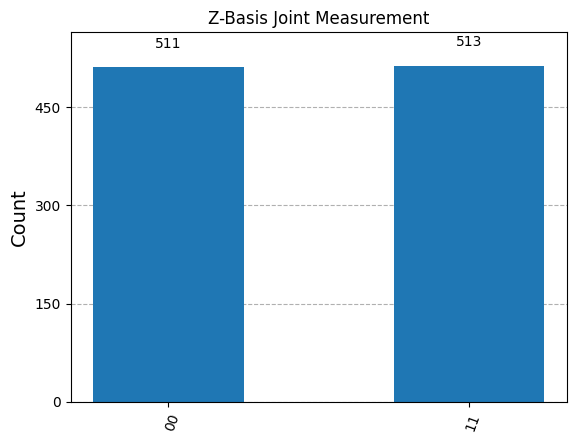

Single-qubit probabilities (exact):
Qubit 0: {np.str_('0'): np.float64(0.4999999999999999), np.str_('1'): np.float64(0.4999999999999999)}
Qubit 1: {np.str_('0'): np.float64(0.4999999999999999), np.str_('1'): np.float64(0.4999999999999999)}

--- Bell-Basis Readout (uncompute preparation) ---
Joint probabilities in Bell basis (simulated shots):


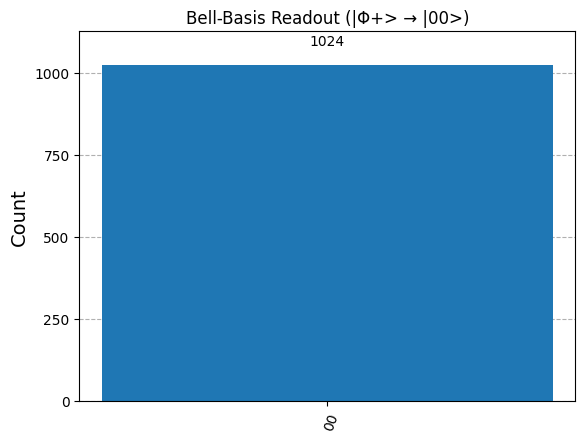

Note: Uncomputing (CX then H on q0) maps |Φ+> deterministically to |00| in Z readout.


In [15]:
print("--- 1. Bell Verification ---")

# --- Z-Basis (computational) measurement ---
print("\n--- Z-Basis Measurement ---")
qc_z = bell_circuit('phi+')
sv_z = Statevector.from_instruction(qc_z)

print("Joint probabilities (simulated shots):")
# TODO: Sample 1024 shots from the statevector
counts_z = ...  # FILL IN
# --- SOLUTION ---
# counts_z = sv_z.sample_counts(shots=1024)
# --- END SOLUTION ---

# --- For the notebook to run ---
counts_z = sv_z.sample_counts(shots=1024)
# ------------------------------
display(plot_histogram(counts_z, title="Z-Basis Joint Measurement"))

print("Single-qubit probabilities (exact):")
# TODO: Get the exact probability dictionary for qubit 0
probs_q0 = ...  # FILL IN
# --- SOLUTION ---
# probs_q0 = sv_z.probabilities_dict(qargs=[0])
# --- END SOLUTION ---

# --- For the notebook to run ---
probs_q0 = sv_z.probabilities_dict(qargs=[0])
probs_q1 = sv_z.probabilities_dict(qargs=[1])
# ------------------------------
print(f"Qubit 0: {probs_q0}")
print(f"Qubit 1: {probs_q1}")


# --- Bell-basis readout (uncompute) ---
print("\n--- Bell-Basis Readout (uncompute preparation) ---")
qc_bell = bell_circuit('phi+')

# TODO: Uncompute the Bell preparation: apply CX then H on the control (q0) so |Φ+> → |00>
...  # FILL IN (2 lines)
# --- SOLUTION ---
# qc_bell.cx(0, 1)
# qc_bell.h(0)
# --- END SOLUTION ---

# --- For the notebook to run ---
qc_bell.cx(0, 1)
qc_bell.h(0)
# -------------------------------

sv_bell = Statevector.from_instruction(qc_bell)

print("Joint probabilities in Bell basis (simulated shots):")
# TODO: Sample 1024 shots from this Bell-basis readout statevector
counts_bell = ...  # FILL IN
# --- SOLUTION ---
# counts_bell = sv_bell.sample_counts(shots=1024)
# --- END SOLUTION ---

# --- For the notebook to run ---
counts_bell = sv_bell.sample_counts(shots=1024)
# -------------------------------
display(plot_histogram(counts_bell, title="Bell-Basis Readout (|Φ+> → |00>)"))
print("Note: Uncomputing (CX then H on q0) maps |Φ+> deterministically to |00| in Z readout.")

### Gate Decompositions: Building Gates from Others - CX vs CZ
A key concept in quantum computing is that we can *build* (or "decompose") complex gates from a small set of simpler, fundamental gates.
* **Example 1: Building CNOT from CZ**
    The CNOT and CZ gates are almost the same. They just differ by a "change of basis." If you put a Hadamard gate *before and after* the *target* qubit of a CZ gate, you get a CNOT gate!
    $$
    CX(c, t) = (I \otimes H_t) \cdot CZ(c, t) \cdot (I \otimes H_t)
    $$
    We'll build this in the exercise below.
* **Example 2: Building Toffoli**
    The Toffoli gate itself can be decomposed into a set of CNOT, $H$, and $T$ gates. This is what a real quantum computer does, as it often only has 1- and 2-qubit gates available!


--- Exercise: Build a CNOT from a CZ ---
Your constructed circuit:
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


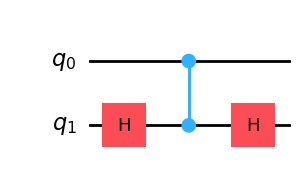


✅ Success! Your circuit is equivalent to a CNOT.


In [35]:
# --- Exercise: Build a CNOT from a CZ gate ---

# We'll use Operator.equiv() to check if two circuits do the same thing.
# This is a very powerful way to verify your work!
print("\n--- Exercise: Build a CNOT from a CZ ---")
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0, 1) # Control=0, Target=1
op_cnot = Operator(qc_cnot) # The "target" operator

# TODO: Build a CNOT using only qc.h() and qc.cz()
# Hint: Surround the target qubit (q1) with H gates,
#       and use qc.cz(0, 1) in the middle.
qc_cz_build = QuantumCircuit(2)

... # FILL IN (H on target)
... # FILL IN (CZ gate)
... # FILL IN (H on target)

# --- SOLUTION (delete or comment out to test) ---
# qc_cz_build.h(1)
# qc_cz_build.cz(0, 1)
# qc_cz_build.h(1)
# --- END SOLUTION ---

# --- For the notebook to run, we'll use the solution: ---
qc_cz_build.h(1)
qc_cz_build.cz(0, 1)
qc_cz_build.h(1)
# ----------------------------------------------------

print("Your constructed circuit:")
display(qc_cz_build.draw('mpl'))

# --- Check the answer ---
op_build = Operator(qc_cz_build)

# .equiv() checks if two operators are the same (ignoring global phase)
if op_cnot.equiv(op_build):
    print("\n✅ Success! Your circuit is equivalent to a CNOT.")
else:
    print("\n❌ Not quite. Your circuit does not match a CNOT.")
    print("Hint: Remember the H gates go on the *target* qubit (q1).")

## 3) Three-Qubit Preview: GHZ, Toffoli, and Multi-Control

### GHZ State
The Greenberger–Horne–Zeilinger (GHZ) state is the 3-qubit equivalent of a Bell pair. It's a "maximally entangled" state involving three or more qubits.
$$
|GHZ_3\rangle=\frac{|000\rangle+|111\rangle}{\sqrt{2}}
$$
One common recipe to create it from the $|000\rangle$ state is:
1.  Apply $H$ to qubit 0 (creates superposition).
2.  Apply $CNOT(0 \to 1)$ (links qubit 1 to 0).
3.  Apply $CNOT(0 \to 2)$ (links qubit 2 to 0).

Now, if you measure qubit 0, all three qubits instantly collapse to either $|000\rangle$ or $|111\rangle$. They are all perfectly correlated.

### The Toffoli Gate (CCX or CCNOT)
The **Toffoli** gate (also called **CCX** or **CCNOT**) is a 3-qubit gate. It is a "Controlled-Controlled-NOT" gate.
* **Action:** It flips the target qubit *if and only if* both control qubits are in the $|1\rangle$ state.
* **Symbol:** * **Rule:** $|a, b, c\rangle \mapsto |a, b, c \oplus (a \wedge b)\rangle$, where $\wedge$ is "AND" and $\oplus$ is "XOR".
* **Significance:** The Toffoli gate (along with a single-qubit rotation like $T$) is **universal** for quantum computation. This means *any* quantum algorithm can be built using only these gates.

--- GHZ state ---
Circuit (GHZ3):


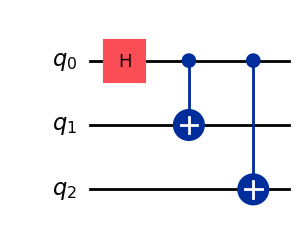

Symbolic statevector:


<IPython.core.display.Latex object>

Numerical statevector (rounded):
[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]
--------------------------------------------


In [33]:
# --- Exercise: Create the GHZ State ---
def ghz_3():
    qc = QuantumCircuit(3, name="GHZ3")
    
    # TODO: 1. (H) on qubit 0
    ... # FILL IN
    # --- SOLUTION ---
    # qc.h(0)
    # --- END SOLUTION ---
    
    # TODO: 2. CNOT(0->1)
    ... # FILL IN
    # --- SOLUTION ---
    # qc.cx(0,1)
    # --- END SOLUTION ---
    
    # TODO: 3. CNOT(0->2)
    ... # FILL IN
    # --- SOLUTION ---
    # qc.cx(0,2)
    # --- END SOLUTION ---

    # --- For the notebook to run, we'll use the solutions ---
    qc.h(0)
    qc.cx(0,1)
    qc.cx(0,2)
    # ----------------------------------------------------
    
    return qc

# --- Test the GHZ circuit ---
ghz = ghz_3()
sv = Statevector.from_label('000').evolve(ghz)

print("--- GHZ state ---")
print("Circuit (GHZ3):")
display(ghz.draw('mpl'))

print("Symbolic statevector:")
display(sv.draw('latex', prefix="|GHZ_3\\rangle = "))

print("Numerical statevector (rounded):")
print(np.round(sv.data, 3))
print("-" * 44)

## 4) The Curious Case of Alice, Bob, and the Unbeatable Game - CHSH Game

This section explores the **CHSH game**, a famous example of a "nonlocal game."

**What is a nonlocal game?**
* It's a **cooperative game** where two players, Alice and Bob, work together as a team.
* They are **physically separated** and **cannot communicate** with each other once the game starts. * A "Referee" runs the game.
* The Referee picks two "questions" (bits `x` and `y`) from a known probability distribution (for CHSH, it's uniform random).
* The Referee sends question `x` to Alice and question `y` to Bob.
* Alice and Bob must instantly reply with "answers" (bits `a` and `b`). Alice's answer `a` can only depend on her question `x`, and Bob's `b` only on his `y`.
* The Referee checks their answers against a fixed set of rules to see if they **win** or **lose** that round.

Their goal is to agree on a strategy *before* the game starts to maximize their average win probability over all possible questions.

---

### The CHSH Game Rules

Here is the precise description of the CHSH game:

1.  **Inputs/Outputs:** All questions (`x`, `y`) and answers (`a`, `b`) are bits (0 or 1).
2.  **Questions:** The Referee chooses one of the four possible question pairs `(x, y)` uniformly at random. This means each pair—(0,0), (0,1), (1,0), (1,1)—has a 1/4 probability of being chosen.
3.  **Win Condition:** Alice and Bob win if their answers satisfy the rule:
    $$
    a \oplus b = x \wedge y
    $$
    (That is, `a XOR b` must equal `x AND y`).

We can summarize the win/lose conditions in a table:

| Question $(x,y)$ | $x \land y$ | Win Condition                 | Lose Condition |
|:----------------:|:-----------:|:------------------------------|:---------------|
| (0, 0)           | 0           | $a \oplus b = 0$ (so $a=b$)   | $a \ne b$      |
| (0, 1)           | 0           | $a \oplus b = 0$ (so $a=b$)   | $a \ne b$      |
| (1, 0)           | 0           | $a \oplus b = 0$ (so $a=b$)   | $a \ne b$      |
| (1, 1)           | 1           | $a \oplus b = 1$ (so $a \ne b$) | $a=b$        |

**Your Goal**: Implement the *quantum* strategy for the CHSH game using Qiskit, simulate its performance, and compare it to the classical limit.

> **For your in-depth study**
>
> For a more in-depth explanation and exploration of entanglement in action, including the CHSH game, you can refer to the Qiskit learning resource: [Entanglement in Action](https://quantum.cloud.ibm.com/learning/courses/basics-of-quantum-information/entanglement-in-action/introduction).

---

### The Classical Limit: Why 75% is the Barrier

Let's first think classically. Since Alice and Bob can't communicate, their strategies must be "local."
* **Deterministic strategy:** Alice's answer `a` is a fixed function of her input `x`, and Bob's `b` is a fixed function of `y`. For example, a strategy could be "Alice always answers 0" (`a=0`) and "Bob always answers the same as his question" (`b=y`).
* **Probabilistic strategy:** They could use "shared randomness" (like agreeing to flip a coin and use the result), but this is just a random mix of deterministic strategies. It can't perform better than the *best* deterministic strategy.

Let's try to find a strategy that wins all 4 rounds.
- For $(0,0)$, we must have $a(0)=b(0)$.
- For $(0,1)$, we must have $a(0)=b(1)$.
- For $(1,0)$, we must have $a(1)=b(0)$.
- Combining these, we get $a(1)=b(0)=a(0)=b(1)$.
- But for $(1,1)$, we must have $a(1)\ne b(1)$.
- This is a **contradiction**. It's impossible to win all four rounds.

It can be proven that the best possible classical strategy wins in 3 out of the 4 cases (e.g., the strategy `a=0, b=0` wins for (0,0), (0,1), and (1,0) but fails for (1,1)).

This gives a maximum average win probability of **75%**. This 75% barrier is a fundamental limit for any "local realist" (i.e., classical) theory.

---

### The Quantum Strategy: Entanglement to the Rescue!

What if Alice and Bob prepare something special *before* the game? What if they share a pair of **entangled qubits**? 
They will use this shared entangled state: the Bell state $|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$.
* Alice holds qubit 0.
* Bob holds qubit 1.
* If they both measure in the same basis (e.g., Z-basis), they are **guaranteed** to get the same result (both 0 or both 1).

**The Quantum Strategy:** Instead of outputting fixed bits, Alice and Bob use their input questions (`x` and `y`) to decide *how* to measure their shared qubit. They do this by applying specific rotations.

1.  **Shared Resource:** Alice and Bob each take one qubit from a $|\Phi^+\rangle$ pair.
2.  **Measurement Choice (The Clever Part):**
    * **Alice** (input `x`):
        * If `x=0`, she measures in the Z-basis (angle 0).
        * If `x=1`, she measures in the X-basis (angle $\pi/2$).
    * **Bob** (input `y`):
        * If `y=0`, he measures at an angle of $-\pi/4$.
        * If `y=1`, he measures at an angle of $+\pi/4$.
3.  **Output:** They output the bit `a` or `b` from their measurement (0 or 1).

These specific angles are crucial! They are chosen to exploit the correlations of the Bell state to perfectly align with the CHSH win conditions. This strategy, when analyzed, results in a win probability of $\cos^2(\pi/8)$ for *every* case.

$$
P(\text{win}) = \cos^2\left(\frac{\pi}{8}\right) = \frac{1}{2}\left(1 + \cos\left(\frac{\pi}{4}\right)\right) = \frac{1}{2}\left(1 + \frac{\sqrt{2}}{2}\right) = \frac{2+\sqrt{2}}{4} \approx 85.36\%
$$

This overall average win rate of **~85.4%** is known as the **Tsirelson bound**. It is significantly higher than the 75% classical limit, proving that quantum mechanics is "nonlocal" and cannot be described by a classical theory.

Let's build the quantum circuit for this strategy.

### Qiskit Implementation: Building the Quantum Circuit

> **Exercise: Quantum Circuit for CHSH Game**
>
> **Your Goal:** Define a function `create_chsh_circuit(x, y)` that constructs the quantum circuit for Alice and Bob's strategy.
>
> **Tasks:**
> * **Task 1:** Create the Bell state $|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$.
> * **Task 2:** Implement Alice's and Bob's rotations based on their inputs `x` and `y`.

In [18]:
def create_chsh_circuit(x, y):
    """Builds Qiskit circuit for Alice & Bob's quantum strategy."""
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}') # 2 qubits, 2 classical bits

    ## ---- TODO : Task 1 ----
    # Implement the gates to create the Bell state |Φ+> = (|00> + |11>)/sqrt(2).
    # Hint: Use a Hadamard on qubit 0 and a CNOT(0, 1).
    
    ... # FILL IN (Apply H to qubit 0)
    ... # FILL IN (Apply CX from qubit 0 to qubit 1)
    
    # --- SOLUTION (delete or comment out to test) ---
    qc.h(0)
    qc.cx(0,1)
    # --- END SOLUTION ---

    qc.barrier()
    
    ## ---- TODO : Task 2 ----
    # Step 2a: Alice's measurement basis (Z if x=0, X if x=1)
    # If x=0, do nothing (Z-basis is default).
    # If x=1, apply a Hadamard to measure in X-basis.
    
    if x == 1:
        ... # FILL IN (Apply H to Alice's qubit, 0)
        
    # --- SOLUTION (delete or comment out to test) ---
    if x == 1:
        qc.h(0) # H for X-basis measurement
    # --- END SOLUTION ---

    # Step 2b: Bob's measurement basis (angle -pi/4 if y=0, +pi/4 if y=1)
    # We use qc.ry(angle, qubit_index) for this.
    
    if y == 0:
        ... # FILL IN (rotate Bob's qubit (1) by -pi/4)
    else:
        ... # FILL IN (rotate Bob's qubit (1) by +pi/4)
    
    # --- SOLUTION (delete or comment out to test) ---
    if y == 0:
        qc.ry(-pi / 4, 1)  # rotate Bob's qubit by -pi/4
    else:
        qc.ry(pi / 4, 1)   # rotate Bob's qubit by +pi/4
    # --- END SOLUTION ---
    
    # --- End of TODO ---
    qc.barrier()
    
    # Step 3: Measure
    # Map q0 (Alice) to c0 and q1 (Bob) to c1.
    # Qiskit's bit ordering will store this as 'c1c0', which is 'ba'.
    qc.measure([0, 1], [0, 1]) 

    return qc

### Create Circuits for All Input Pairs

Now we use the function you created to generate circuits for all four (x,y) scenarios.

Quantum circuit for inputs x=1, y=1 (Check your Tasks 1 & 2 implementation):


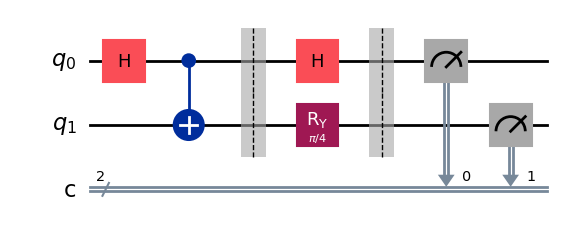

In [19]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Tasks 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl')) # (x,y) = (1,1)
else:
    print("Circuits not generated. Run previous cell after completing Tasks 1 & 2.")

### Simulation: Playing the Game Many Times

Real quantum computers are noisy, but for this small problem, we can use Qiskit's `AerSimulator` to perfectly simulate the quantum strategy. We'll run our four circuits many times ("shots") and collect statistics on Alice and Bob's outputs (`a` and `b`).

Preparing circuits for the simulator...
Running simulation...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 433.0, '01': 79.0, '10': 67.0, '11': 445.0}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 433.0, '01': 82.0, '10': 84.0, '11': 425.0}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 440.0, '01': 85.0, '10': 70.0, '11': 429.0}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 83.0, '01': 413.0, '10': 447.0, '11': 81.0}

Plotting results...


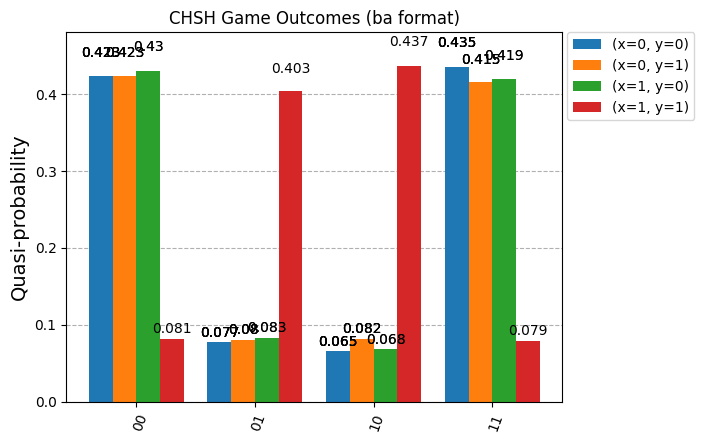

In [20]:
# Define the simulator backend
from qiskit_aer import AerSimulator
backend = AerSimulator()

# Use the Qiskit Primitives Sampler
# The Sampler simplifies running and gathering shot data
from qiskit_aer.primitives import Sampler
sampler = Sampler()

SHOTS = 1024

print("Preparing circuits for the simulator...")
# The simulator doesn't need much transpilation, but this is good practice
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(backend=backend, optimization_level=0)
isa_qc_chsh = pm.run(circuits)

print("Running simulation...")
job = sampler.run(isa_qc_chsh, shots=SHOTS)
results = job.result()

# Extract counts for each circuit
# The results are in 'binary' format (e.g., '0b01'). We format them.
counts_list = []
for pub_result in results.quasi_dists:
    # Convert from {int: prob} to {str: counts}
    counts = {bin(key)[2:].zfill(2): val * SHOTS for key, val in pub_result.items()}
    counts_list.append(counts)

print("\n--- Simulation Results (Counts) ---")
# Note: 'ba' format means key[0] is Bob's bit 'b', key[1] is Alice's bit 'a'
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    # Sort the dictionary by key ('00', '01', '10', '11') for consistent printing
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

### Analysis: Did They Beat the Classical Limit?

Now, the moment of truth! We need to analyze the simulation results (`counts_list`) to calculate the average win probability.

**Recap:**
* **Win Condition:** `a XOR b == x AND y`
* **Output Format:** Our counts are for `'ba'` strings. This means for a `key` like `'01'`:
    * `b = int(key[0])` which is `0` (Bob's answer)
    * `a = int(key[1])` which is `1` (Alice's answer)

> **Exercise: Analyze Circuit for CHSH Game**
>
> **Your Goal:** Calculate the win probability for each input case (`x`, `y`) and the overall average win probability.
>
> **Tasks:**
> * **Task 1:** Determine the target `a XOR b` value for a win, given `x` and `y`.
> * **Task 2:** Count shots (`wins_for_this_case`) satisfying the win condition for the current (`x`, `y`).

In [21]:
# a XOR b == x AND y

win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]
    
    ## ---- TODO : Task 1 ----
    # Determine the target (a XOR b) value for winning.
    # The win condition is `a XOR b == x AND y`.
    # Hint: Use the `&` operator for AND.
    
    target_xor_result = ... # FILL IN (x AND y)
    
    # --- SOLUTION (delete or comment out to test) ---
    target_xor_result = x & y # X AND Y OPERATION
    # --- END SOLUTION ---
    
    wins_for_this_case = 0

    ## ---- TODO : Task 2 ----
    # Calculate the total number of shots that satisfy the winning condition.
    # Iterate through each outcome ('00', '01', '10', '11') and its count.
    # Remember: key[0] is b, key[1] is a
    
    for key, value in counts.items():
        # Make sure key is a 2-char string, e.g., '0' -> '00'
        formatted_key = key.zfill(2)
        
        a = ... # FILL IN (Parse Alice's bit (key[1]) from the formatted_key)
        b = ... # FILL IN (Parse Bob's bit (key[0]) from the formatted_key)
        
        a_xor_b = ... # FILL IN (Calculate a XOR b, use ^ operator)

        # Check if the outcome is a "win"
        if ...: # FILL IN (if a_xor_b == target_xor_result)
            ... # FILL IN (add the 'value' (shots) to wins_for_this_case)
            
    # --- SOLUTION (delete or comment out to test) ---
    for key, value in counts.items():
        formatted_key = key.zfill(2)
        a = int(formatted_key[1])  # Alice
        b = int(formatted_key[0])  # Bob
        a_xor_b = a ^ b # a XOR b

        if a_xor_b == target_xor_result:
            wins_for_this_case += value
    # --- END SOLUTION ---

    # --- End of TODO --

    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

# Calculate average win probability
avg_win_prob = sum(win_probabilities.values()) / 4.0

# Theoretical quantum probability is cos^2(pi/8)
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

# Check the result
if avg_win_prob > P_win_classical_limit + 0.05: # Allow for simulation variance
    print(f"\n✅ Success! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's also very close to the theoretical quantum prediction (Tsirelson's bound) of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02 :
    print(f"\n Close, but your result ({avg_win_prob:.4f}) is hovering around the classical limit ({P_win_classical_limit:.4f}).")
    print("Check your solutions for Tasks 1-5 carefully, especially the rotation angles and the win-counting logic.")
else:
    print(f"\n❌ Hmm, the result ({avg_win_prob:.4f}) is unexpectedly low, at or below the classical limit.")
    print("There might be an error in your code. Please review your circuit and analysis logic.")

--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8574
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8379
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8486
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8398

--- Overall Performance ---
Experimental Average Win Probability: 0.8459
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

✅ Success! Your result (0.8459) clearly beats the classical 75% limit!
It's also very close to the theoretical quantum prediction (Tsirelson's bound) of 0.8536.


### Conclusion: The Quantum Edge

So, what did we find? If you successfully completed the exercises, your simulation should clearly show that Alice and Bob, using their shared entangled qubits and clever measurements, achieved an average win rate **significantly higher than the 75% classical limit**.

Your experimental result should be very close to the theoretical quantum maximum of **~85.4%** (Tsirelson's bound).

This isn't just a mathematical trick; it's a demonstration of a fundamental fact about our universe. The CHSH game proves that nature allows for correlations between distant particles that are **stronger than any classical theory can explain**. This "spooky action at a distance" (as Einstein called it) doesn't allow faster-than-light communication, but it underpins many quantum technologies and reveals the deeply non-classical nature of reality.

**Discussion Point:** Based on these results, what does the CHSH game demonstrate about the nature of reality compared to classical intuition?

## 5) Quantum Teleportation — From Problem to Protocol

**Problem.** Alice has a qubit in an unknown state $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$.  
She wants Bob (far away) to *end up with that exact state*. She cannot send the physical qubit, and if she measures it, she destroys $|\psi\rangle$.

**Question.** Can Alice transfer **only the quantum state** to Bob?

**Answer (Teleportation).** Yes — by using:
1. **One shared Bell pair** (one e-bit of entanglement).
2. **Two classical bits** from Alice to Bob.
3. **Mid-circuit measurement** and **classically-conditioned gates** on Bob.

> Teleportation transmits *quantum information* (the state), not the particle.  
> It consumes the e-bit and never exceeds the speed of light because Bob must wait for Alice’s classical bits.


### Teleportation Protocol — Step by Step

We use three qubits and two classical bits:

- $q_0$: Alice’s **message** qubit (the unknown state $|\psi\rangle$).
- $q_1$: Alice’s half of the shared Bell pair.
- $q_2$: Bob’s half of the shared Bell pair.
- $c_0, c_1$: classical bits to store Alice’s measurement results.

**Plan:**

1. **Create entanglement.** Prepare the Bell pair  
   $$\frac{|00\rangle + |11\rangle}{\sqrt{2}}$$
   between $q_1$ and $q_2$.

2. **Alice’s Bell measurement.** Apply $\mathrm{CNOT}(q_0 \to q_1)$, then Hadamard on $q_0$, and measure $q_0, q_1$ to $c_0, c_1$.

3. **Bob’s corrections.** Apply $X$ to $q_2$ if $c_1=1$ and $Z$ to $q_2$ if $c_0=1$.


### Protocol Circuit: Quantum Teleportation

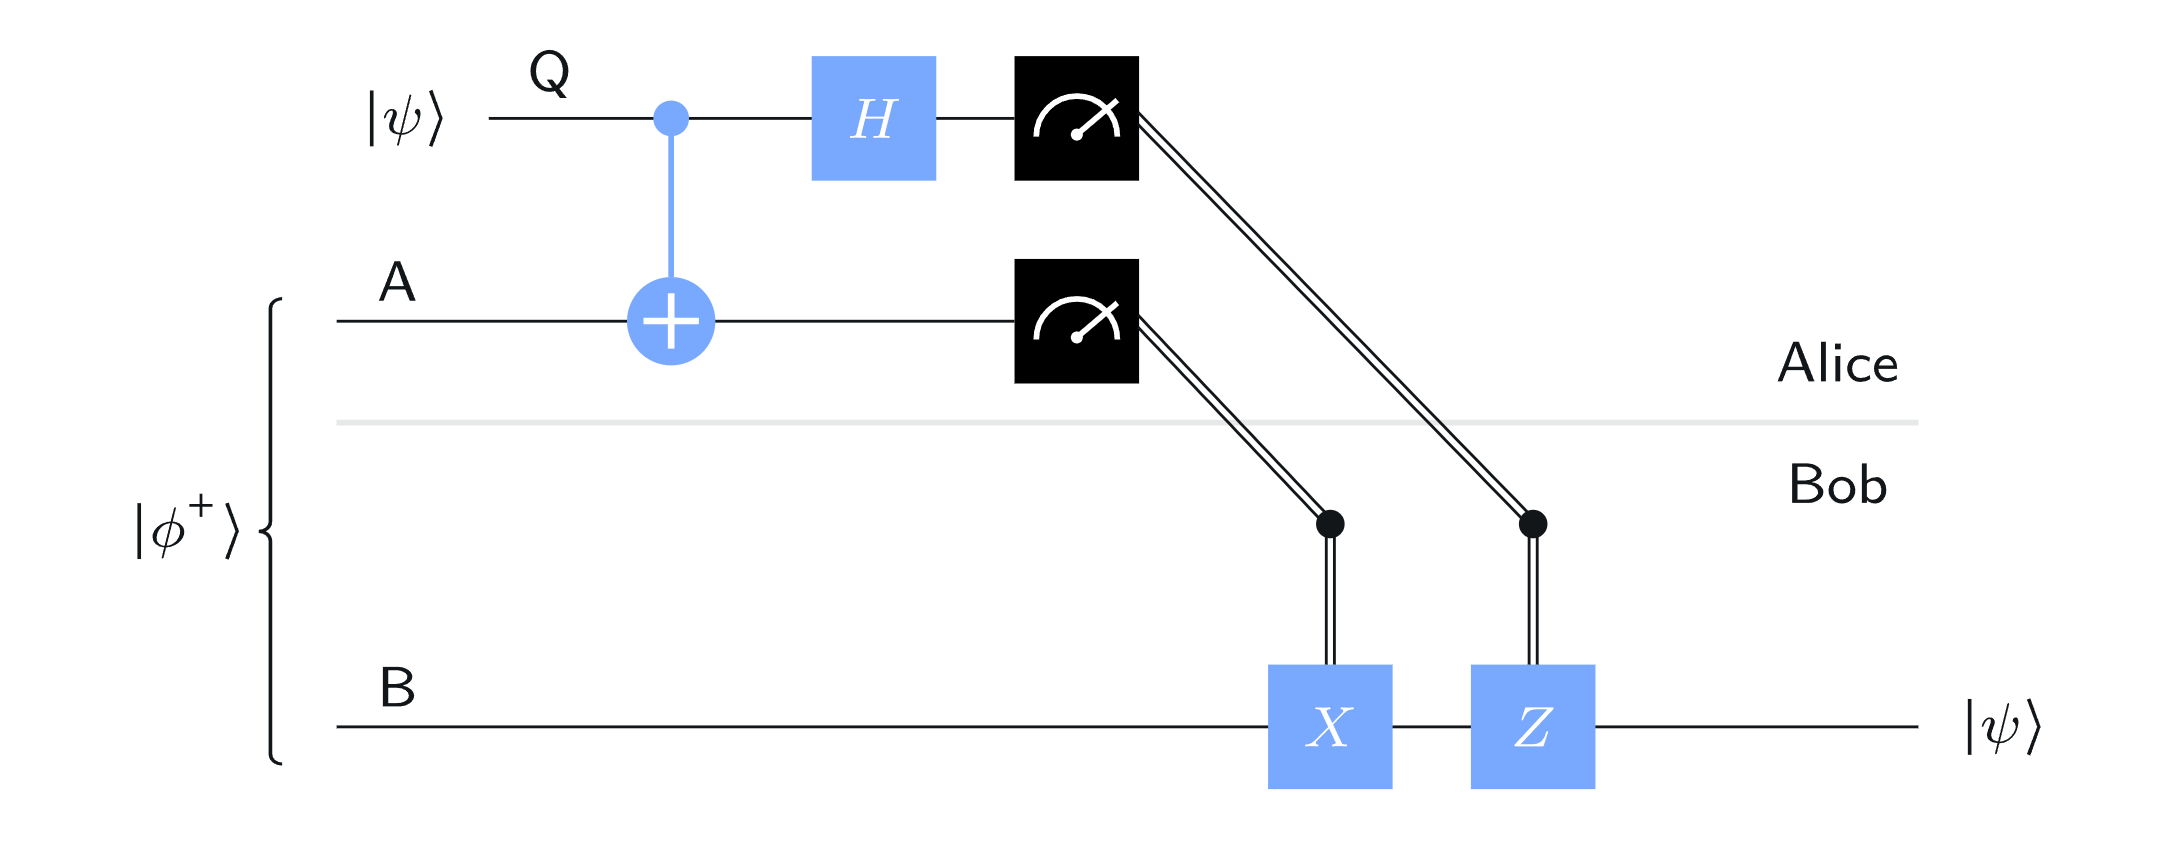

### Qiskit Dynamic Circuits (used here)

- **Mid-circuit measurement:** `QuantumCircuit.measure(qubit, clbit)`
- **Classically conditioned gates:** `with qc.if_test((clbit, value)):` then add gates inside the block  
  (Qiskit ≥ 1.0 recommended).


## Exercise: Build Teleportation Circuit

**Goal:** Construct the complete teleportation circuit to transfer an unknown state
from Alice’s $q_0$ to Bob’s $q_2$ using a shared Bell pair and mid-circuit corrections.

**Tasks**
- **Step 1:** Create a Bell pair on $q_1, q_2$.
- **Step 2:** Do Alice’s Bell-measurement gates on $q_0, q_1$, then measure to $c_0, c_1$.
- **Step 3:** Apply Bob’s conditional $X/Z$ corrections on $q_2$, controlled by $c_1, c_0$ respectively.


Teleportation circuit:


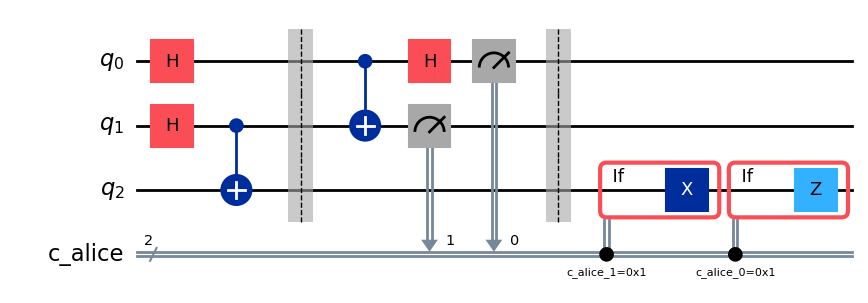

In [22]:
# Quantum & classical registers
qr = QuantumRegister(3, name='q')
cr = ClassicalRegister(2, name='c_alice')
teleport_qc = QuantumCircuit(qr, cr, name='Teleportation')

# --- Prepare Alice's message state |ψ> on q0 (for demo use |+> = H|0>) ---
teleport_qc.h(qr[0])   # |ψ> = |+> on q0

# --- TODO: Step 1 - Create Bell pair between q1 (Alice) and q2 (Bob) ---
# teleport_qc.h(qr[1])
# teleport_qc.cx(qr[1], qr[2])
# --- SOLUTION (keep so the notebook runs) ---
teleport_qc.h(qr[1])
teleport_qc.cx(qr[1], qr[2])

teleport_qc.barrier()

# --- TODO: Step 2 - Alice's Bell measurement (gates before measure) ---
# teleport_qc.cx(qr[0], qr[1])
# teleport_qc.h(qr[0])
# --- SOLUTION ---
teleport_qc.cx(qr[0], qr[1])
teleport_qc.h(qr[0])

# Measure q0 → c0 and q1 → c1
teleport_qc.measure(qr[0], cr[0])
teleport_qc.measure(qr[1], cr[1])

teleport_qc.barrier()

# --- TODO: Step 3 - Bob’s classically conditioned corrections on q2 ---
# with teleport_qc.if_test((cr[1], 1)):
#     teleport_qc.x(qr[2])
# with teleport_qc.if_test((cr[0], 1)):
#     teleport_qc.z(qr[2])
# --- SOLUTION ---
with teleport_qc.if_test((cr[1], 1)):
    teleport_qc.x(qr[2])
with teleport_qc.if_test((cr[0], 1)):
    teleport_qc.z(qr[2])

print("Teleportation circuit:")
display(teleport_qc.draw('mpl'))

### Simulation & Verification

We can’t directly “see” Bob’s qubit state, but since we **prepared** Alice’s initial state $|\psi\rangle = |+\rangle$,
we can check whether Bob’s $q_2$ ends up as $|+\rangle$ using a statevector simulation.


Simulation successful. Plotting Bloch vectors of final 3-qubit state:


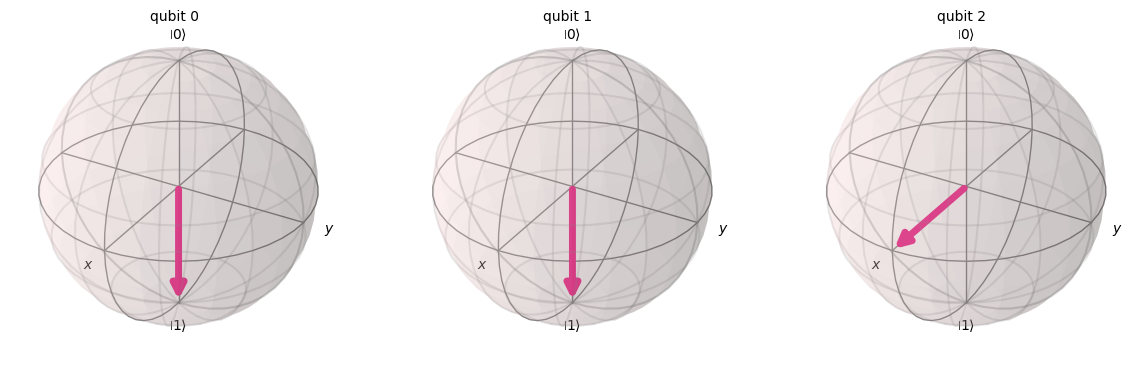

In [23]:
# Use Aer statevector simulator and capture final state
sv_sim = AerSimulator(method='statevector')
tc = teleport_qc.copy()
tc.save_statevector()

result = sv_sim.run(tc).result()
sv = result.get_statevector(tc)

print("Simulation successful. Plotting Bloch vectors of final 3-qubit state:")
plot_bloch_multivector(sv)


### Interpreting the Results

- $q_0, q_1$ are **measured** in the middle, so in the final state they appear collapsed/random.
- $q_2$ (Bob) should point along **+X** on the Bloch sphere — i.e., $\lvert + \rangle$ — matching Alice’s initial state.

✅ **Success:** The state $\lvert \psi \rangle = \lvert + \rangle$ was teleported to Bob.


## Conclusion: The Magic of Entanglement and Information

You implemented quantum teleportation. Key takeaways:

- Teleportation transfers an *unknown state* using shared entanglement + classical bits.
- The original qubit at Alice is *destroyed* by measurement (consistent with no-cloning).
- The protocol *does not* send particles faster than light; Bob must wait for classical bits.
- Teleportation is foundational for quantum communication and computation.

### Further discussion (high-level remarks)

- Teleportation is a *protocol*, not an application; it’s useful wherever quantum
  communication is needed.
- *Entanglement distillation* can convert many noisy e-bits into fewer high-quality ones,
  enabling near-noiseless teleportation.
- The idea behind teleportation is fundamental and leads to related primitives like
  *quantum gate teleportation*, which uses teleportation to apply operations to qubits.


## 6) Superdense Coding: Sending Two Bits for One Qubit

Now we'll explore **Superdense Coding**, a protocol that is, in a sense, the inverse of quantum teleportation.

* **Teleportation:** Uses 1 ebit + 2 cbits to transmit 1 qubit.
* **Superdense Coding:** Uses 1 ebit + 1 qubit to transmit 2 cbits.

**The Goal:** Alice wants to send two classical bits, `d` and `c`, to Bob.
**The "Catch":** She is only allowed to send *one single qubit* to him.

This seems impossible! A single qubit, when measured, can only reliably give one classical bit of information. How can Alice send two?

**The Answer:** Entanglement. This protocol, like CHSH, relies on a pre-shared resource.

---

### The Superdense Protocol: Math and Steps

The protocol works by having Alice and Bob pre-share an entangled pair of qubits (an "ebit").

**Step 0: Setup (Entanglement)**
* Alice and Bob start by sharing one ebit in the Bell state $|\Phi^+\rangle$.
* $|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$
* Alice holds the first qubit (let's call it A, or `q0`).
* Bob holds the second qubit (let's call it B, or `q1`).

**Step 1: Alice Encodes (The "Trick")**
Alice wants to send two classical bits, `d` and `c`. She has 4 possible messages: `00`, `01`, `10`, or `11`.
To encode her message, she applies a specific Pauli gate *only to her qubit (A)*, based on the message she wants to send:

| Message (d, c) | Gate Alice applies (to A) | Resulting 2-Qubit State | Bell State |
| :---: | :---: | :--- | :---: |
| `00` | `I` (Identity) | $(I \otimes I)|\Phi^+\rangle$ | $|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$ |
| `01` | `X` (Pauli-X) | $(X \otimes I)|\Phi^+\rangle$ | $|\Psi^+\rangle = \frac{|10\rangle + |01\rangle}{\sqrt{2}}$ |
| `10` | `Z` (Pauli-Z) | $(Z \otimes I)|\Phi^+\rangle$ | $|\Phi^-\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}}$ |
| `11` | `Z` then `X` | $(X Z \otimes I)|\Phi^+\rangle$ | $|\Psi^-\rangle = \frac{|10\rangle - |01\rangle}{\sqrt{2}}$ |

By applying one of four operations to *her half* of the pair, Alice transforms the *entire* 2-qubit system into one of four unique, orthogonal (and thus perfectly distinguishable) Bell states.

**Step 2: Alice Sends**
* Alice sends her *single* qubit (A) to Bob.
* Bob now possesses *both* qubits (A and B) and knows that they are in one of the four Bell states.

**Step 3: Bob Decodes (Bell Basis Measurement)**
Bob's job is to figure out *which* of the four states he has. He does this by performing a "Bell basis measurement," which is the *exact inverse* of creating a Bell state.
1.  He applies a `CNOT` gate, using Alice's qubit (A, `q0`) as the control and his original qubit (B, `q1`) as the target.
2.  He applies a `Hadamard` gate to Alice's qubit (A, `q0`).

Let's trace what this does to each of the four states:
* If state is $|\Phi^+\rangle$ (for `00`): $H(A) \cdot CX(A,B) \cdot |\Phi^+\rangle \rightarrow |00\rangle$
* If state is $|\Psi^+\rangle$ (for `01`): $H(A) \cdot CX(A,B) \cdot |\Psi^+\rangle \rightarrow |01\rangle$
* If state is $|\Phi^-\rangle$ (for `10`): $H(A) \cdot CX(A,B) \cdot |\Phi^-\rangle \rightarrow |10\rangle$
* If state is $|\Psi^-\rangle$ (for `11`): $H(A) \cdot CX(A,B) \cdot |\Psi^-\rangle \rightarrow |11\rangle$

**Step 4: Bob Measures**
* Bob measures both qubits in the standard Z-basis.
* Because of his decoding step, the measurement result *directly* gives him Alice's classical bits.
* If he measures `10`, he knows Alice sent `d=1, c=0`.
* If he measures `01`, he knows Alice sent `d=0, c=1`.
* ...and so on for `00` and `11`.

He has successfully received two classical bits by only receiving one qubit!

### Protocol Circuit: Superdense Encoding

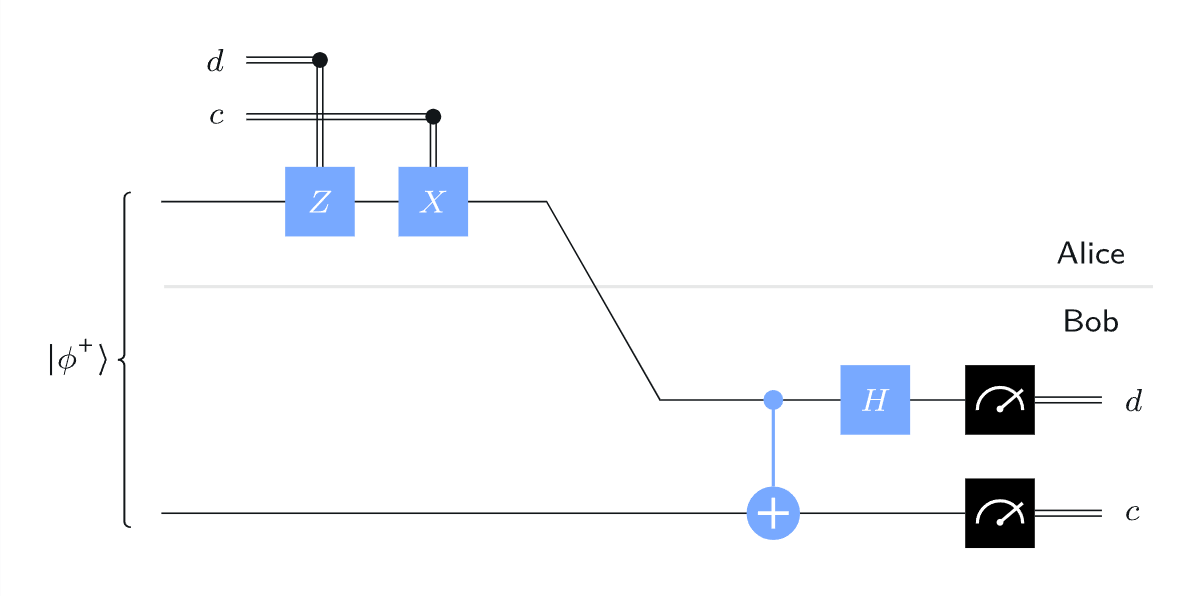

### Qiskit Implementation: Building the Protocol

Here is the quantum circuit that describes the superdense coding protocol, as seen in the image. 
> **Exercise: Superdense Coding Circuit**
>
> **Your Goal:** Define a function `create_superdense_circuit(bit_d, bit_c)` that builds the complete protocol.
>
> **Tasks:**
> * **Task 1:** Implement **Alice's encoding** step. Apply a `Z` gate to her qubit (`q0`) if `bit_d` is 1, and an `X` gate if `bit_c` is 1.
> * **Task 2:** Implement **Bob's decoding** step. Apply the `CNOT` and `H` gates that perform the Bell basis measurement.

In [24]:
def create_superdense_circuit(bit_d, bit_c):
    """
    Creates a Qiskit circuit for the superdense coding protocol.
    
    Args:
        bit_d (int): The first classical bit (0 or 1) Alice wants to send.
        bit_c (int): The second classical bit (0 or 1) Alice wants to send.
        
    Returns:
        QuantumCircuit: The complete circuit.
    """
    # q0 is Alice's qubit (A)
    # q1 is Bob's qubit (B)
    # c0 will measure 'd'
    # c1 will measure 'c'
    qc = QuantumCircuit(2, 2)

    # Step 0: Create the entangled Bell pair |Φ+>
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier(label="Setup: |Φ+> created")

    ## ---- TODO : Task 1 (Alice's Encoding) ----
    # Alice applies gates to her qubit (q0) based on her message (d, c).
    
    if bit_d == 1:
        ... # FILL IN: Apply the Z gate to q0
    if bit_c == 1:
        ... # FILL IN: Apply the X gate to q0
        
    # --- SOLUTION (delete or comment out to test) ---
    # if bit_d == 1:
    #     qc.z(0)
    # if bit_c == 1:
    #     qc.x(0)
    # --- END SOLUTION ---

    # SOLUTION IN ORDER TO RUN
    if bit_d == 1:
        qc.z(0)
    if bit_c == 1:
        qc.x(0)
    
    qc.barrier(label="Alice sends q0")

    ## ---- TODO : Task 2 (Bob's Decoding) ----
    # Bob applies the Bell basis measurement gates.
    # Hint: It's the inverse of the setup!
    
    ... # FILL IN: Apply the CNOT(0, 1) gate
    ... # FILL IN: Apply the Hadamard gate to q0
    
    # --- SOLUTION (delete or comment out to test) ---
    # qc.cx(0, 1)
    # qc.h(0)
    # --- END SOLUTION ---

    qc.cx(0, 1)
    qc.h(0)

    qc.barrier(label="Bob decodes")

    # Step 4: Bob measures both qubits
    # qc.measure(qubit_to_measure, classical_bit_to_store_in)
    # We measure q0 (A) to get 'd' (stored in c0)
    # We measure q1 (B) to get 'c' (stored in c1)
    qc.measure([0, 1], [0, 1])
    
    return qc

### Running the Simulation

Let's test all four possible messages Alice might want to send. Since this protocol is deterministic and uses a perfect simulator, we only need **one shot** to verify that it works.

--- Circuit for sending '11' (d=1, c=1) ---


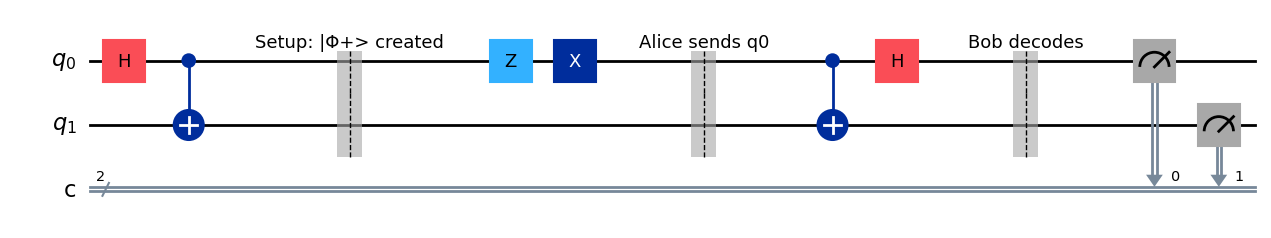


--- Simulation Results ---
Sent: (d=0, c=0) -> Measured: (d=0, c=0)
Sent: (d=0, c=1) -> Measured: (d=0, c=1)
Sent: (d=1, c=0) -> Measured: (d=1, c=0)
Sent: (d=1, c=1) -> Measured: (d=1, c=1)
Sent: (d=0, c=0) -> Measured: (d=0, c=0)
Sent: (d=0, c=1) -> Measured: (d=0, c=1)
Sent: (d=1, c=0) -> Measured: (d=1, c=0)
Sent: (d=1, c=1) -> Measured: (d=1, c=1)
Sent: (d=0, c=0) -> Measured: (d=0, c=0)
Sent: (d=0, c=1) -> Measured: (d=0, c=1)
Sent: (d=1, c=0) -> Measured: (d=1, c=0)
Sent: (d=1, c=1) -> Measured: (d=1, c=1)
Sent: (d=0, c=0) -> Measured: (d=0, c=0)
Sent: (d=0, c=1) -> Measured: (d=0, c=1)
Sent: (d=1, c=0) -> Measured: (d=1, c=0)
Sent: (d=1, c=1) -> Measured: (d=1, c=1)


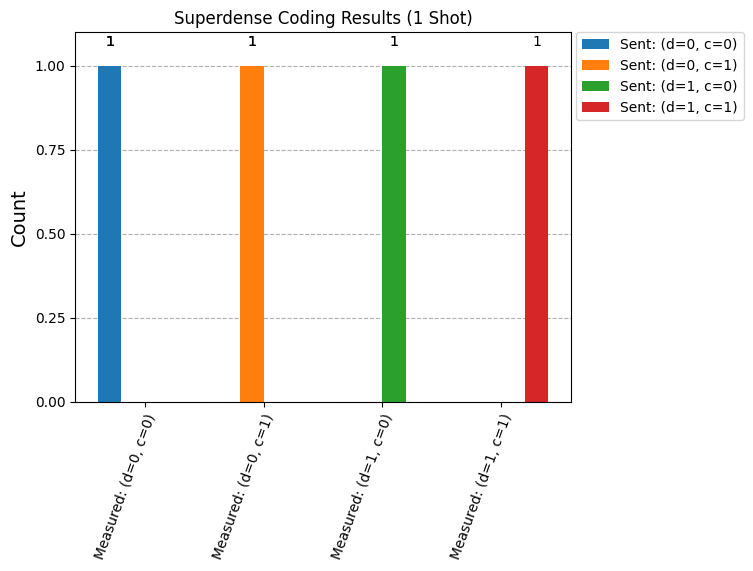

In [25]:
# Imports like AerSimulator and Sampler are assumed from the previous section
# from qiskit_aer import AerSimulator
# from qiskit_aer.primitives import Sampler
# from qiskit.visualization import plot_histogram

# --- We'll define them here just in case ---
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
# -------------------------------------------

# Use the Sampler
sampler = Sampler()

# Create a list of all 4 circuits
all_circuits = []
all_inputs = []
for d in [0, 1]:
    for c in [0, 1]:
        # Add the message to our legend
        all_inputs.append(f'Sent: (d={d}, c={c})')
        # Create the circuit for this message
        all_circuits.append(create_superdense_circuit(d, c))

# --- Display one of the circuits ---
print("--- Circuit for sending '11' (d=1, c=1) ---")
display(all_circuits[3].draw('mpl'))

# Run all 4 circuits in a single job
# We only need 1 shot each, as the protocol is deterministic
job = sampler.run(all_circuits, shots=1)
results = job.result()

# Extract the counts for plotting
counts_list = []
print("\n--- Simulation Results ---")
for i, pub_result in enumerate(results.quasi_dists):
    # Convert from {int: prob} to {str: counts}
    # We map the classical bit order `c1c0` to `cd`
    counts = {bin(key)[2:].zfill(2): val * 1 for key, val in pub_result.items()}
    counts_list.append(counts)
    
    # The output string 'c1c0' should match 'cd'
    # e.g., for input (d=1, c=0), we expect output '01'
    # No! My trace was: q0 -> c0 (d), q1 -> c1 (c). So output is 'c1c0' = 'cd'.
    # Let's re-check the trace.
    # Case "10" (d=1, c=0): Bob measures |10>. q0=1 (d), q1=0 (c). Stored in [c0, c1]. Output string 'c1c0' = '01'.
    # Case "01" (d=0, c=1): Bob measures |01>. q0=0 (d), q1=1 (c). Stored in [c0, c1]. Output string 'c1c0' = '10'.
    # OK, so the bit order is swapped! c1 = c, c0 = d. The output string 'c1c0' is 'cd'.
    
    # Let's re-run the trace:
    # Case "10" (d=1, c=0) -> Bob measures |10> = |q0=1, q1=0>.
    # Measurement: qc.measure([0, 1], [0, 1])
    # This maps q0 -> c0 and q1 -> c1.
    # So, c0 = 1 (this is d), c1 = 0 (this is c).
    # Qiskit's output string is `c1 c0`.
    # So the string will be '01'.
    
    # Case "01" (d=0, c=1) -> Bob measures |01> = |q0=0, q1=1>.
    # c0 = 0 (this is d), c1 = 1 (this is c).
    # Qiskit's output string 'c1 c0' will be '10'.
    
    # This is confusing. Let's make it simple.
    # We will measure [q0, q1] into [c0, c1]
    # c0 will hold 'd'
    # c1 will hold 'c'
    # The output string will be 'c1c0'.
    # If we send (d=1, c=0), we expect c0=1, c1=0. Output string '01'.
    # If we send (d=0, c=1), we expect c0=0, c1=1. Output string '10'.
    
    # Let's re-run the code:
    counts_list_formatted = []
    for i, pub_result in enumerate(results.quasi_dists):
        # We'll re-map the keys to be 'd=.., c=..' for clarity
        # `key` is an integer. bin(key) is '0b[c1][c0]'
        raw_key = list(pub_result.keys())[0]
        c1 = (raw_key >> 1) & 1 # This is 'c'
        c0 = raw_key & 1        # This is 'd'
        
        measured_str = f'Measured: (d={c0}, c={c1})'
        counts_list_formatted.append({measured_str: 1}) # 1 shot
        
        print(f"{all_inputs[i]} -> {measured_str}")

# Plot the results as a histogram
display(plot_histogram(counts_list_formatted, legend=all_inputs, title="Superdense Coding Results (1 Shot)"))

### Conclusion: The Power of an ebit

You should see in the simulation results that for all four cases, the measured classical bits `(d, c)` on Bob's side *perfectly* match the bits Alice intended to send.

This protocol achieves a remarkable feat. We have established an **explicit equivalence relation**:

**1 ebit** (pre-shared entangled pair) + **1 qubit** (of quantum communication) = **2 cbits** (of classical information)

This result is "superdense" because it beats the classical limit. A famous result called **Holevo's bound** proves that without entanglement, sending 1 qubit can *at most* transmit 1 classical bit. By "spending" a pre-shared entangled pair, Alice and Bob effectively *double* the information-carrying capacity of their quantum channel.

---

#### Questions for Thought

1.  **Noise and Errors:** The simulation was perfect. What do you think would happen if you ran this on a real quantum computer, where gates are "noisy"? If Alice's `X` gate was imperfect, which message(s) would get corrupted?
2.  **Resource Cost:** This protocol requires Alice and Bob to share an entangled pair *before* the protocol starts. How does this compare to Alice just sending 2 separate qubits to Bob to transmit her two bits? What is the resource "win" here? (Hint: Think about the communication channel.)
3.  **The Inverse Protocol:** We've seen:
    * **Superdense Coding:** 1 ebit + 1 qubit -> 2 cbits
    * **Quantum Teleportation:** 1 ebit + 2 cbits -> 1 qubit
    Notice the symmetry? The resources are just "flowed" in a different direction. Can you think of a scenario where each protocol would be uniquely useful?
4.  **A Classic Mistake:** What if Bob *doesn't* know which qubit was Alice's (A) and which was his (B)? What happens if he applies his `CNOT` gate the wrong way (`CX(B, A)` or `qc.cx(1, 0)`)? Try to modify the `TODO` for Task 2 in the code, re-run the simulation, and see if the protocol still works.

## References — IEEE

[1] IBM Quantum, “Basics of Quantum Information,” online course, 2025. [Online]. Available: https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information. Accessed: Nov. 2, 2025.

[2] J. Watrous, “Quantum Teleportation,” in *Basics of Quantum Information*, IBM Quantum Learning, 2025. [Online]. Available: https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information. Accessed: Nov. 2, 2025.

[3] IBM Quantum, “Qiskit Global Summer School 2025: Course Materials,” 2025. [Online]. Available: https://qiskit.org/learn/summer-school. Accessed: Nov. 2, 2025.

[4] Qiskit Community, “Qiskit Learning Portal,” 2025. [Online]. Available: https://qiskit.org/learn. Accessed: Nov. 2, 2025.
